# CNN for image


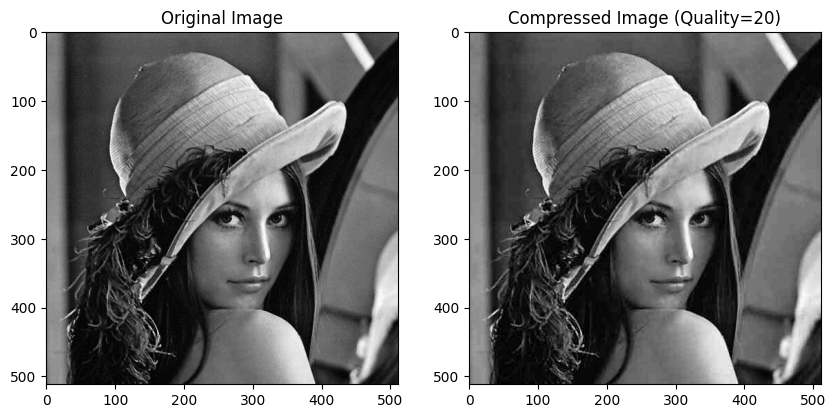

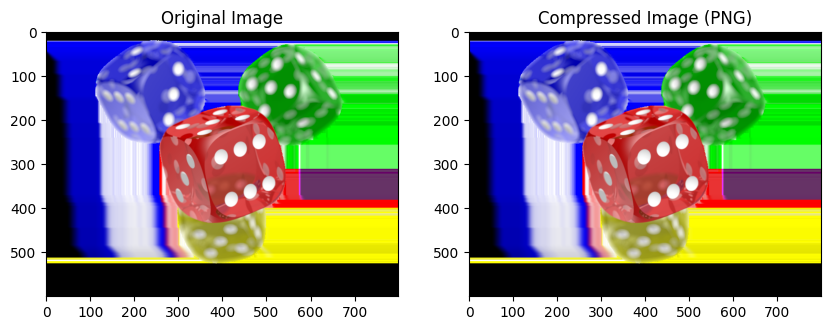

In [ ]:
# Install required libraries (if not installed)
!pip install tensorflow keras numpy matplotlib seaborn scikit-learn opencv-python

import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from keras.datasets import mnist, cifar10

# Task 1.1: Image Compression using Lossy JPEG
def compress_jpeg(image_path, quality=20):
    image = cv2.imread(image_path)
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    _, compressed_img = cv2.imencode('.jpg', image, encode_param)
    decompressed_img = cv2.imdecode(compressed_img, cv2.IMREAD_COLOR)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(decompressed_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Compressed Image (Quality={quality})')
    plt.show()

# Task 1.2: Image Compression using PNG
def compress_png(image_path):
    image = cv2.imread(image_path)
    _, compressed_img = cv2.imencode('.png', image)
    decompressed_img = cv2.imdecode(compressed_img, cv2.IMREAD_COLOR)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(decompressed_img, cv2.COLOR_BGR2RGB))
    plt.title('Compressed Image (PNG)')
    plt.show()

compress_jpeg('/content/opencv_transform.jpg', 20) # Provide image path
compress_png('/content/PNG_transparency_demonstration_1.png') # Provide image path
# Task 2: CNN on MNIST and CIFAR-10
# def build_cnn_model(input_shape, num_classes):
#     model = keras.Sequential([
#         keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#         keras.layers.MaxPooling2D((2, 2)),
#         keras.layers.Conv2D(64, (3, 3), activation='relu'),
#         keras.layers.MaxPooling2D((2, 2)),
#         keras.layers.Flatten(),
#         keras.layers.Dense(64, activation='relu'),
#         keras.layers.Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# def train_and_evaluate(dataset, name):
#     (X_train, y_train), (X_test, y_test) = dataset.load_data()
#     X_train, X_test = X_train / 255.0, X_test / 255.0
#     input_shape = X_train.shape[1:]
#     num_classes = len(np.unique(y_train))

#     model = build_cnn_model(input_shape, num_classes)
#     history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=2)

#     y_pred = model.predict(X_test)
#     y_pred_classes = np.argmax(y_pred, axis=1)

#     print(f'Classification Report for {name}:')
#     print(classification_report(y_test, y_pred_classes))

#     cm = confusion_matrix(y_test, y_pred_classes)
#     plt.figure(figsize=(10, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#     plt.title(f'Confusion Matrix - {name}')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

#     fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1], pos_label=1)
#     auc_score = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'ROC Curve - {name}')
#     plt.legend()
#     plt.show()

# Run tasks


# # Train CNN models
# train_and_evaluate(mnist, 'MNIST')
# train_and_evaluate(cifar10, 'CIFAR-10')


**TASK: 02**

In [ ]:
def build_cnn_model(input_shape, num_classes):
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def train_and_evaluate(dataset, name):
    (X_train, y_train), (X_test, y_test) = dataset.load_data()

    # Normalize pixel values (0 to 1)
    X_train, X_test = X_train / 255.0, X_test / 255.0

    # **Fix for MNIST dataset**
    if name == 'MNIST':
        X_train = X_train.reshape(-1, 28, 28, 1)  # Add channel dimension
        X_test = X_test.reshape(-1, 28, 28, 1)

    input_shape = X_train.shape[1:]  # Now it includes (height, width, channels)
    num_classes = len(np.unique(y_train))

    model = build_cnn_model(input_shape, num_classes)

    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=2)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    print(f'Classification Report for {name}:')
    print(classification_report(y_test, y_pred_classes))

    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Epoch 1/50
1875/1875 - 59s - 31ms/step - accuracy: 0.9569 - loss: 0.1436 - val_accuracy: 0.9850 - val_loss: 0.0431
Epoch 2/50
1875/1875 - 55s - 29ms/step - accuracy: 0.9850 - loss: 0.0471 - val_accuracy: 0.9884 - val_loss: 0.0350
Epoch 3/50
1875/1875 - 52s - 28ms/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.9890 - val_loss: 0.0329
Epoch 4/50
1875/1875 - 86s - 46ms/step - accuracy: 0.9927 - loss: 0.0239 - val_accuracy: 0.9884 - val_loss: 0.0304
Epoch 5/50
1875/1875 - 53s - 28ms/step - accuracy: 0.9939 - loss: 0.0184 - val_accuracy: 0.9912 - val_loss: 0.0265
Epoch 6/50
1875/1875 - 81s - 43ms/step - accuracy: 0.9954 - loss: 0.0142 - val_accuracy: 0.9911 - val_loss: 0.0314
Epoch 7/50
1875/1875 - 84s - 45ms/step - accuracy: 0.9965 - loss: 0.0113 - val_accuracy: 0.9896 - val_loss: 0.0336
Epoch 8/50
1875/1875 - 81s - 43ms/step - accuracy: 0.9967 - loss: 0.0095 - val_accuracy: 0.9888 - val_loss: 0.0438
Epoch 9/50
1875/1875 - 85s - 45ms/step - accuracy: 0.9973 - loss: 0.0081 - val_a

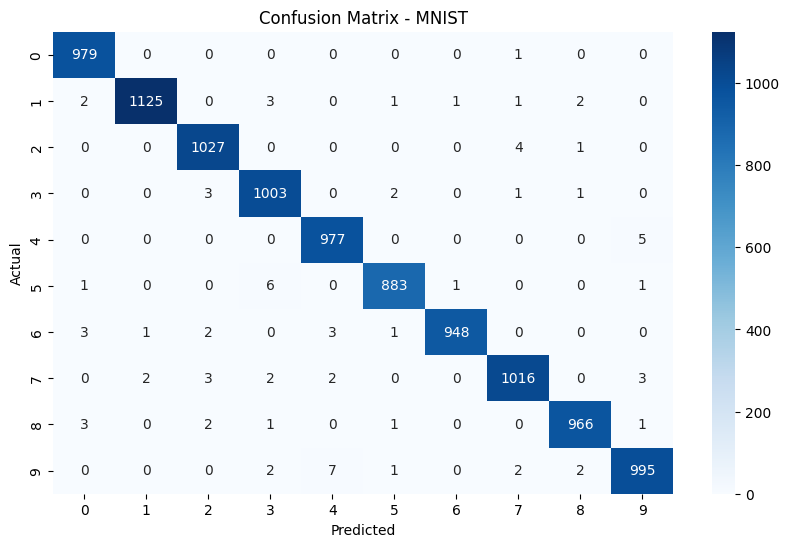

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1563/1563 - 70s - 45ms/step - accuracy: 0.4807 - loss: 1.4441 - val_accuracy: 0.5801 - val_loss: 1.1945
Epoch 2/50
1563/1563 - 77s - 49ms/step - accuracy: 0.6151 - loss: 1.0941 - val_accuracy: 0.6289 - val_loss: 1.0693
Epoch 3/50
1563/1563 - 81s - 52ms/step - accuracy: 0.6620 - loss: 0.9694 - val_accuracy: 0.6504 - val_loss: 0.9978
Epoch 4/50
1563/1563 - 82s - 53ms/step - accuracy: 0.6934 - loss: 0.8796 - val_accuracy: 0.6784 - val_loss: 0.9351
Epoch 5/50
1563/1563 - 81s - 52ms/step - accuracy: 0.7185 - loss: 0.8066 - val_accuracy: 0.6934 - val_loss: 0.8984
Epoch 6/50
1563/1563 - 64s - 41ms/step - accuracy: 0.7400 - loss: 0.7427 - val_accuracy: 0.6973 - val_loss: 0.8959
Epoch 7/50
1563/1563 - 81s - 52ms/step - accuracy: 0.7608 - loss: 0.6896 - val_accuracy: 0.6950 - val_loss: 0.9089
Epoch 8/50
1563/1563 - 81s - 52ms/step - accuracy: 0.7721 - loss: 0.6472 - val_accuracy: 0.6942 - val_loss: 0.9145
Epoch 9/50
1563/1563 - 62s - 40ms/step - accuracy: 0.7913 - loss: 0.5981 - val_a

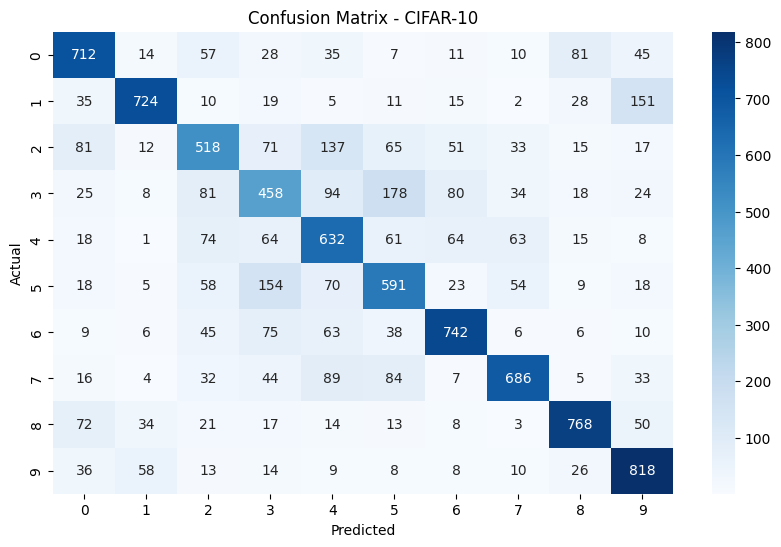

In [10]:
train_and_evaluate(mnist, 'MNIST')
train_and_evaluate(cifar10, 'CIFAR-10')